# Step 1: CSV Input Files Generation Function

In [1]:
import networkx as nx
from matplotlib.pyplot import draw, show
from csv import writer

def generate_and_save_graph(graph_type, vertices, probability, num_edges, display, filename):
    graph = None
    if graph_type == "erdos":
        graph = nx.erdos_renyi_graph(vertices, probability)
    elif graph_type == "barabasi":
        graph = nx.barabasi_albert_graph(vertices, num_edges)
    elif graph_type == "watts":
        try:
            graph = nx.watts_strogatz_graph(vertices, num_edges, probability)
        except Exception as e:
            print("Unable to build a connected Watts-Strogatz graph with the given parameters. Exception:", e)
            return

    if graph is None:
        print("Invalid graph type specified.")
        return

    try:
        with open(filename, 'w', newline='') as outfile:
            csvwriter = writer(outfile)
            for edge in graph.edges:
                csvwriter.writerow(edge)
        print(f"Graph saved to {filename}")
        
        if display:
            nx.draw(graph, with_labels=True)
            show()
    except IOError as e:
        print(f"Unable to open or write to {filename} due to IOError: {e}")

# Step 2: Run the below code to generate Networks

### Barabási-Albert networks with 1000/5000/10000 Nodes

In [2]:
generate_and_save_graph(graph_type="barabasi", vertices=1000, probability=.3, num_edges=2, display=False, filename="barabasi_graph_1000.csv")
generate_and_save_graph(graph_type="barabasi", vertices=5000, probability=.3, num_edges=2, display=False, filename="barabasi_graph_5000.csv")
generate_and_save_graph(graph_type="barabasi", vertices=10000, probability=.3, num_edges=2, display=False, filename="barabasi_graph_10000.csv")

Graph saved to barabasi_graph_1000.csv
Graph saved to barabasi_graph_5000.csv
Graph saved to barabasi_graph_10000.csv


### Erdös-Rényi network with 1000/5000/10000 Nodes

In [3]:
generate_and_save_graph(graph_type="erdos", vertices=1000, probability=0.005, num_edges=2, display=False, filename="erdos_graph_1000.csv")
generate_and_save_graph(graph_type="erdos", vertices=5000, probability=0.005, num_edges=2, display=False, filename="erdos_graph_5000.csv")
generate_and_save_graph(graph_type="erdos", vertices=10000, probability=0.005, num_edges=2, display=False, filename="erdos_graph_10000.csv")

Graph saved to erdos_graph_1000.csv
Graph saved to erdos_graph_5000.csv
Graph saved to erdos_graph_10000.csv


### Watts-Strogatz networks with 1000/5000/10000 Nodes

In [4]:
generate_and_save_graph(graph_type="watts", vertices=1000, num_edges=6, probability=0.1, display=False, filename="watts_graph_1000.csv")
generate_and_save_graph(graph_type="watts", vertices=5000, num_edges=6, probability=0.1, display=False, filename="watts_graph_5000.csv")
generate_and_save_graph(graph_type="watts", vertices=10000, num_edges=6, probability=0.1, display=False, filename="watts_graph_10000.csv")

Graph saved to watts_graph_1000.csv
Graph saved to watts_graph_5000.csv
Graph saved to watts_graph_10000.csv


# Program 1

# Step 3: Function for simulate infection without cure

In [5]:
from csv import writer
from random import choice, random
from csv import reader
def simulate_infection_without_defense(net, patient_zero, infection_probability):
    """Simulate worm propagation and keep track of infections per round."""
    infected = set([patient_zero])  # Initialize with the patient zero
    round_count = 0  # Total number of rounds
    infections_per_round = []  # List to keep track of infections per round

    while len(infected) < len(net.nodes()):
        newly_infected = set()
        for infected_node in infected:
            for neighbor in net.neighbors(infected_node):
                if neighbor not in infected and random() <= infection_probability:
                    newly_infected.add(neighbor)
        infected.update(newly_infected)
        round_count += 1
        infections_per_round.append(len(newly_infected))  # Record the number of new infections this round
        
        # Stop if no new infections
        if not newly_infected:
            break

    return round_count, infections_per_round

def load_network_from_csv(csv_file):
    """Load a network from a CSV file and return a NetworkX graph."""
    net = nx.Graph()
    try:
        with open(csv_file, 'r') as infile:
            for row in reader(infile):
                net.add_edge(row[0], row[1])
    except IOError:
        print(f"Unable to open or read from {csv_file}")
        return None
    return net

### Example: 3 different network with 10000 nodes.

In [6]:
infection_probability = 0.2  # Example probability of infection
initial_infected_node = '110'  
csv_file = 'barabasi_graph_10000.csv'  # Update this with your actual file path
net1 = load_network_from_csv(csv_file)
csv_file = 'erdos_graph_10000.csv'  # Update this with your actual file path
net2 = load_network_from_csv(csv_file)
csv_file = 'watts_graph_10000.csv'  # Update this with your actual file path
net3 = load_network_from_csv(csv_file)

### To visualize number of iterations and number of infected nodes per iterations

## Note: If any Infections per round is showing [0], Please rerun the below cell till it is non zero.

### For example: Infections per round-1: [0]/ Infections per round-2: [0]/ Infections per round-3: [0]

In [7]:
rounds_to_infect_1, infections_per_round_1 = simulate_infection_without_defense(net1, initial_infected_node, infection_probability)
rounds_to_infect_2, infections_per_round_2 = simulate_infection_without_defense(net2, initial_infected_node, infection_probability)
rounds_to_infect_3, infections_per_round_3 = simulate_infection_without_defense(net3, initial_infected_node, infection_probability)

print(f"Total rounds to infect the barabasi-network: {rounds_to_infect_1}")
print("Infections per round-1:", infections_per_round_1)
print(f"Total rounds to infect the erdos-network: {rounds_to_infect_2}")
print("Infections per round-2:", infections_per_round_2)
print(f"Total rounds to infect the watts-network: {rounds_to_infect_3}")
print("Infections per round-3:", infections_per_round_3)

Total rounds to infect the barabasi-network: 27
Infections per round-1: [3, 47, 117, 224, 479, 896, 1238, 1442, 1348, 1201, 993, 654, 522, 332, 183, 112, 74, 48, 28, 22, 14, 10, 4, 3, 2, 2, 0]
Total rounds to infect the erdos-network: 6
Infections per round-2: [12, 101, 1040, 5945, 2896, 5]
Total rounds to infect the watts-network: 36
Infections per round-3: [2, 3, 6, 2, 5, 5, 12, 16, 28, 33, 48, 72, 93, 114, 160, 231, 285, 400, 514, 660, 793, 955, 1061, 1037, 995, 836, 632, 462, 275, 123, 77, 35, 20, 5, 3, 0]


## Plot Bell shaped curve : To answer question (a)

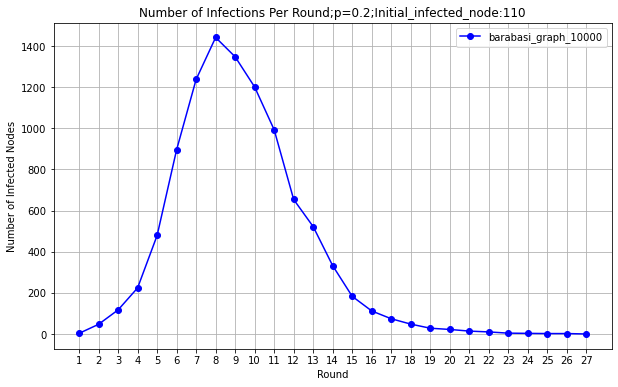

In [19]:
import matplotlib.pyplot as plt

# Create a list of rounds for the x-axis
rounds = list(range(1, rounds_to_infect_1 + 1))

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(rounds, infections_per_round_1, marker='o', linestyle='-', color='b', label='barabasi_graph_10000')

# Adding titles and labels
plt.title('Number of Infections Per Round;p=0.2;Initial_infected_node:110')
plt.xlabel('Round')
plt.ylabel('Number of Infected Nodes')
plt.xticks(rounds)  # Ensure every round is marked if not too many
plt.grid(True)  # Add grid for better readability
plt.legend()  # Add legend to clarify the plot

plt.savefig('barabasi_0.2_bell.png')
# Show plot
plt.show()


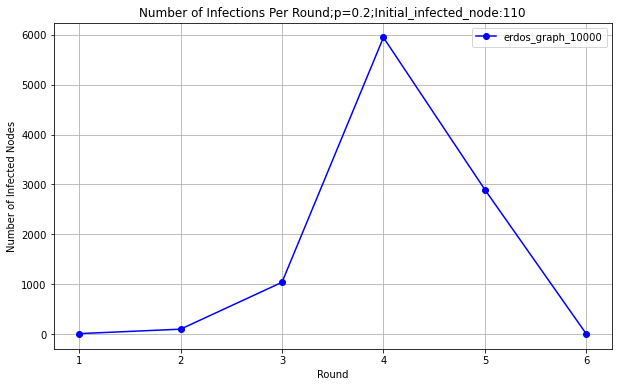

In [20]:
# Create a list of rounds for the x-axis
rounds = list(range(1, rounds_to_infect_2 + 1))

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(rounds, infections_per_round_2, marker='o', linestyle='-', color='b', label='erdos_graph_10000')

# Adding titles and labels
plt.title('Number of Infections Per Round;p=0.2;Initial_infected_node:110')
plt.xlabel('Round')
plt.ylabel('Number of Infected Nodes')
plt.xticks(rounds)  # Ensure every round is marked if not too many
plt.grid(True)  # Add grid for better readability
plt.legend()  # Add legend to clarify the plot

plt.savefig('erdos_0.2_bell.png')
# Show plot
plt.show()

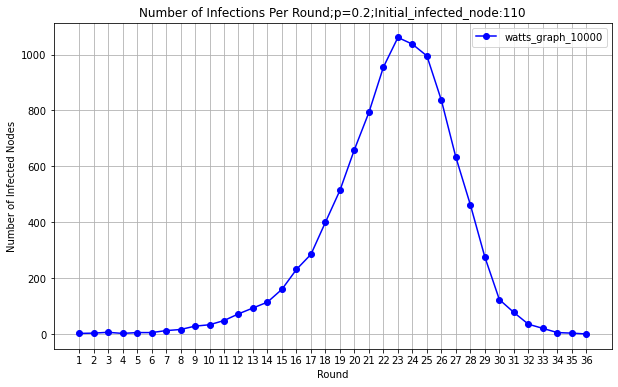

In [21]:
# Create a list of rounds for the x-axis
rounds = list(range(1, rounds_to_infect_3 + 1))

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(rounds, infections_per_round_3, marker='o', linestyle='-', color='b', label='watts_graph_10000')

# Adding titles and labels
plt.title('Number of Infections Per Round;p=0.2;Initial_infected_node:110')
plt.xlabel('Round')
plt.ylabel('Number of Infected Nodes')
plt.xticks(rounds)  # Ensure every round is marked if not too many
plt.grid(True)  # Add grid for better readability
plt.legend()  # Add legend to clarify the plot
plt.savefig('watts_0.2_bell.png')
# Show plot
plt.show()

## Plot S shaped curve: To answer question (a)

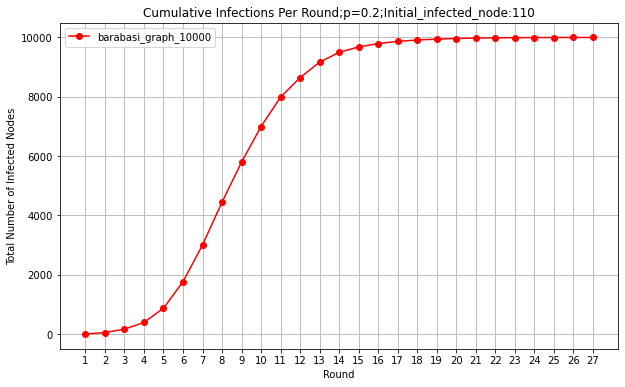

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate cumulative infections
cumulative_infections = np.cumsum(infections_per_round_1)

# Create a list of rounds for the x-axis
rounds = np.arange(1, len(cumulative_infections) + 1)

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(rounds, cumulative_infections, marker='o', linestyle='-', color='r', label='barabasi_graph_10000')

# Adding titles and labels
plt.title('Cumulative Infections Per Round;p=0.2;Initial_infected_node:110')
plt.xlabel('Round')
plt.ylabel('Total Number of Infected Nodes')
plt.xticks(rounds)  # Adjust this if the number of rounds is too large
plt.grid(True)  # Add grid for better readability
plt.legend()  # Add legend to clarify the plot

plt.savefig('barabasi_0.2_S.png')
# Show plot
plt.show()


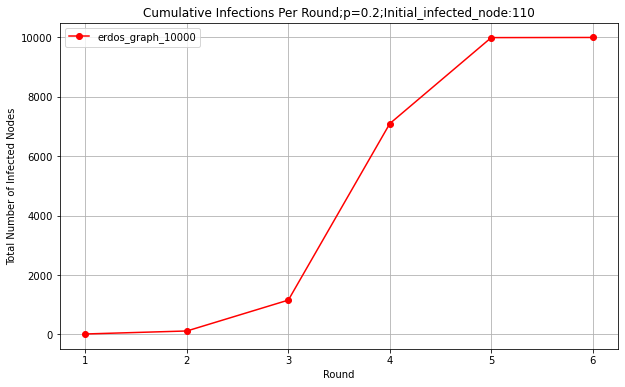

In [23]:
# Calculate cumulative infections
cumulative_infections = np.cumsum(infections_per_round_2)

# Create a list of rounds for the x-axis
rounds = np.arange(1, len(cumulative_infections) + 1)

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(rounds, cumulative_infections, marker='o', linestyle='-', color='r', label='erdos_graph_10000')

# Adding titles and labels
plt.title('Cumulative Infections Per Round;p=0.2;Initial_infected_node:110')
plt.xlabel('Round')
plt.ylabel('Total Number of Infected Nodes')
plt.xticks(rounds)  # Adjust this if the number of rounds is too large
plt.grid(True)  # Add grid for better readability
plt.legend()  # Add legend to clarify the plot

plt.savefig('erdos_0.2_S.png')
# Show plot
plt.show()

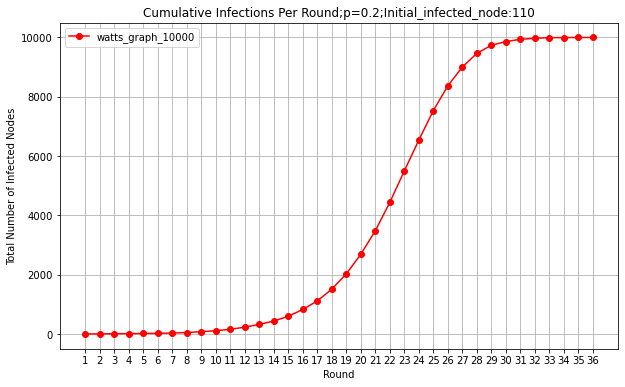

In [24]:
# Calculate cumulative infections
cumulative_infections = np.cumsum(infections_per_round_3)

# Create a list of rounds for the x-axis
rounds = np.arange(1, len(cumulative_infections) + 1)

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(rounds, cumulative_infections, marker='o', linestyle='-', color='r', label='watts_graph_10000')

# Adding titles and labels
plt.title('Cumulative Infections Per Round;p=0.2;Initial_infected_node:110')
plt.xlabel('Round')
plt.ylabel('Total Number of Infected Nodes')
plt.xticks(rounds)  # Adjust this if the number of rounds is too large
plt.grid(True)  # Add grid for better readability
plt.legend()  # Add legend to clarify the plot

plt.savefig('watts_0.2_S.png')
# Show plot
plt.show()

# Step 4: To simutate results: With different Network with different infection Probalities.

## Simulation functions

In [25]:
import os
def simulation_results_no_cure(csv_file, infection_probabilities, initial_infected_node):
    simulation_results_by_probability = {prob: [] for prob in infection_probabilities}
    for csv_file in csv_files:
        net = load_network_from_csv(csv_file)
        network_id = os.path.splitext(os.path.basename(csv_file))[0]  # Extracts '1000', '2000', or '5000' from the file name

        for infection_probability in infection_probabilities:
            rounds_to_infect, infections_per_round = simulate_infection_without_defense(net, initial_infected_node, infection_probability)  # Assuming '110' as patient_zero

            # Append results in a way that's organized by infection probability
            simulation_results_by_probability[infection_probability].append((network_id, infections_per_round))
    return simulation_results_by_probability


## To Plot the graphs

In [44]:
import matplotlib.pyplot as plt
import numpy as np

def plot_all_infections_by_probability_no_cure(simulation_results_by_probability):
    for infection_probability, data in simulation_results_by_probability.items():
        plt.figure(figsize=(12, 7))  # Create a new figure for each infection probability
        
        for network_id, infections_per_round in data:
            rounds = np.arange(1, len(infections_per_round) + 1)
            cumulative_infections = np.cumsum(infections_per_round)
            plt.plot(rounds, cumulative_infections, marker='o', linestyle='-', label=f'Network: {network_id}')
        
        plt.title(f'Total Infections Per Round - Infection Probability {infection_probability}')
        plt.xlabel('Round')
        plt.ylabel('Total Infected Nodes Per Round')
        plt.legend()
        plt.grid(True)
        plt.savefig(f'{network_id}_{infection_probability}_S.png')
        plt.show()

## Different Barabasi-Graph with different probabilities

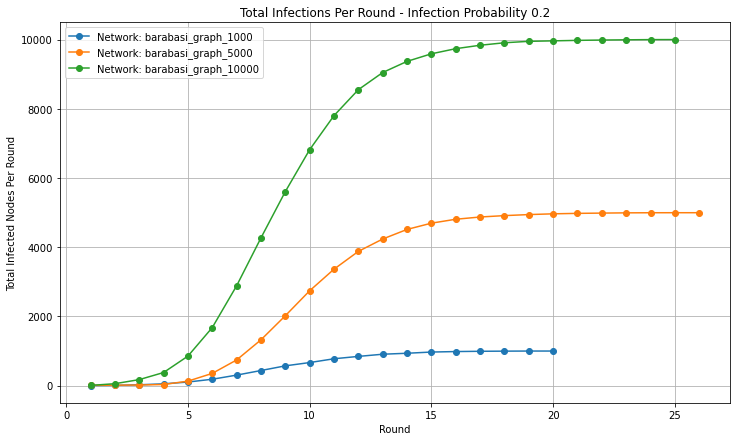

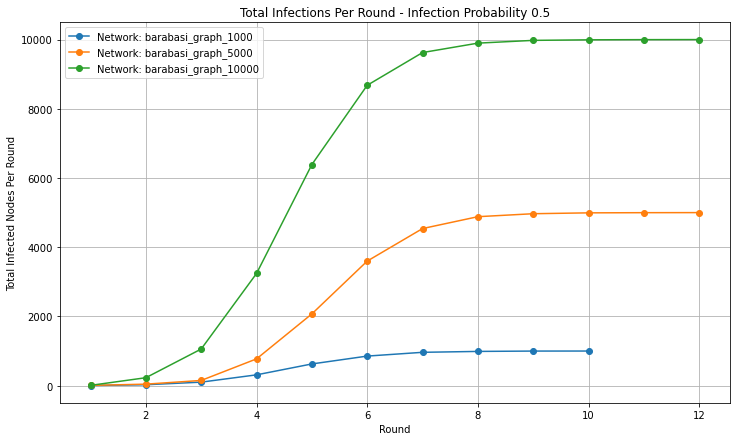

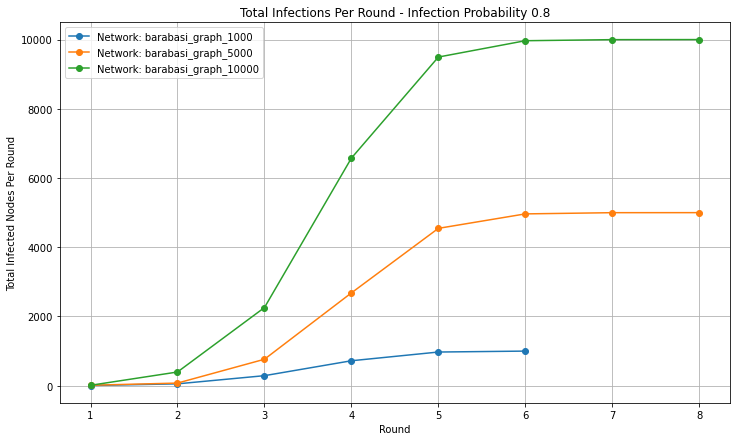

In [100]:
# Assuming load_network_from_csv and simulate_with_infection_count are defined
infection_probabilities = [0.2, 0.5, 0.8]  # Different probabilities to test
csv_files = ['barabasi_graph_1000.csv', 'barabasi_graph_5000.csv', 'barabasi_graph_10000.csv']  #
# Data structure to hold simulation results, organized by infection probability
initial_infected_node = '110'
plot_all_infections_by_probability_no_cure(simulation_results_no_cure(csv_files, infection_probabilities, initial_infected_node))

## Different Erdos-Graph with different probabilities

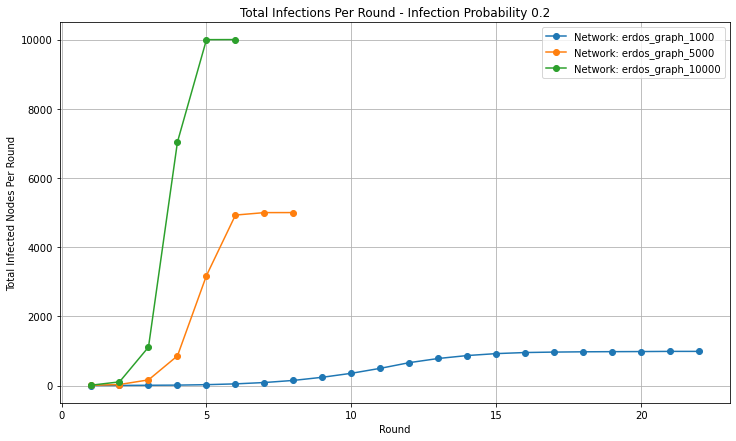

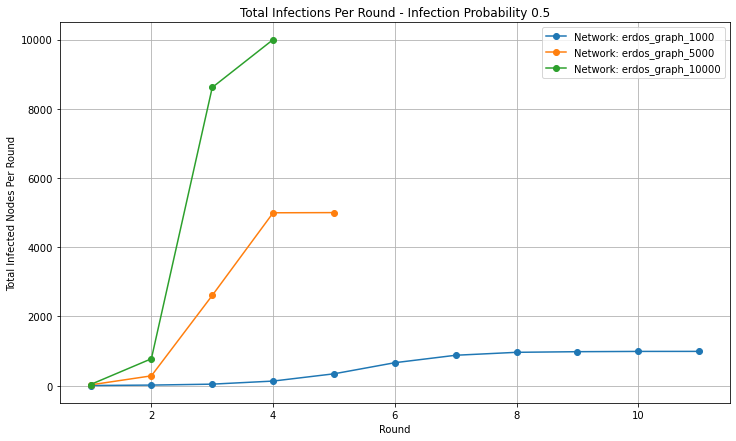

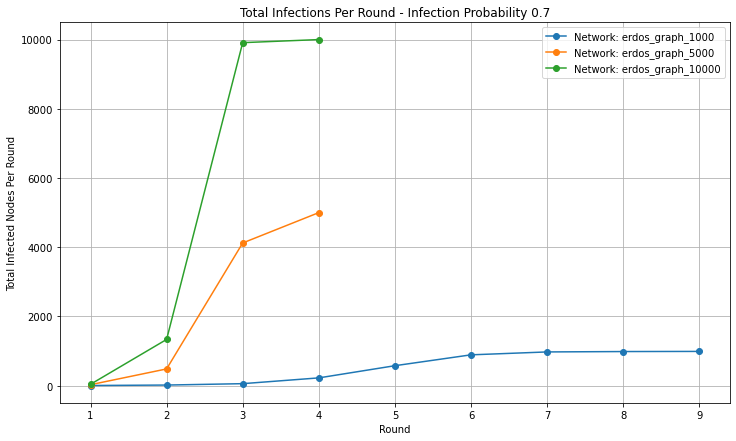

In [38]:
# Assuming load_network_from_csv and simulate_with_infection_count are defined
infection_probabilities = [0.2, 0.5, 0.7]  # Different probabilities to test
csv_files = ['erdos_graph_1000.csv', 'erdos_graph_5000.csv', 'erdos_graph_10000.csv']  #
# Data structure to hold simulation results, organized by infection probability
initial_infected_node = '110'
plot_all_infections_by_probability_no_cure(simulation_results_no_cure(csv_files, infection_probabilities, initial_infected_node))

## Different Watts-Graphs with different probabilities

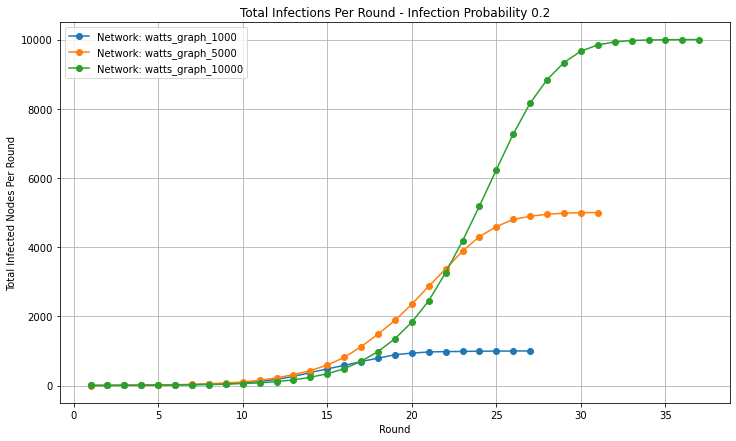

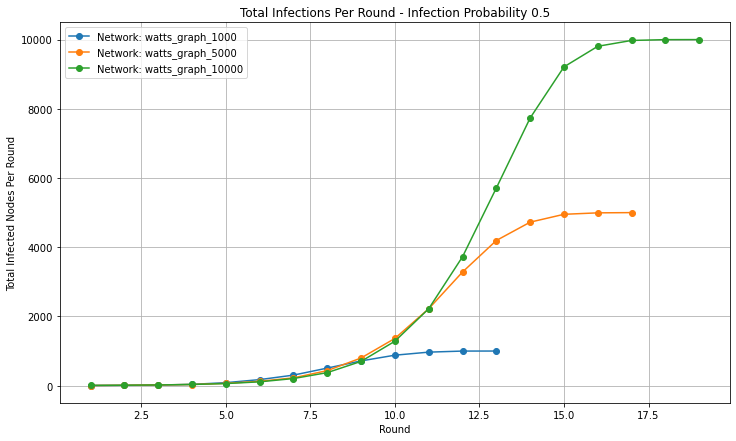

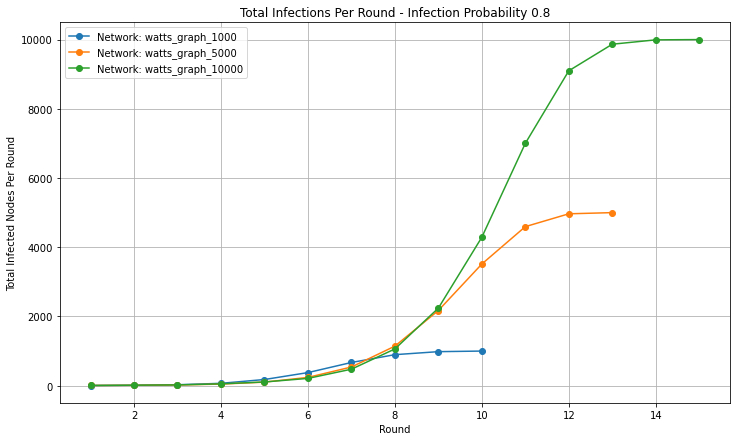

In [42]:
# Assuming load_network_from_csv and simulate_with_infection_count are defined
infection_probabilities = [0.2, 0.5, 0.8]  # Different probabilities to test
csv_files = ['watts_graph_1000.csv', 'watts_graph_5000.csv', 'watts_graph_10000.csv']  #
# Data structure to hold simulation results, organized by infection probability
initial_infected_node = '110'
plot_all_infections_by_probability_no_cure(simulation_results_no_cure(csv_files, infection_probabilities, initial_infected_node))

## Different Network-Graphs with 10000 nodes and different probabilities

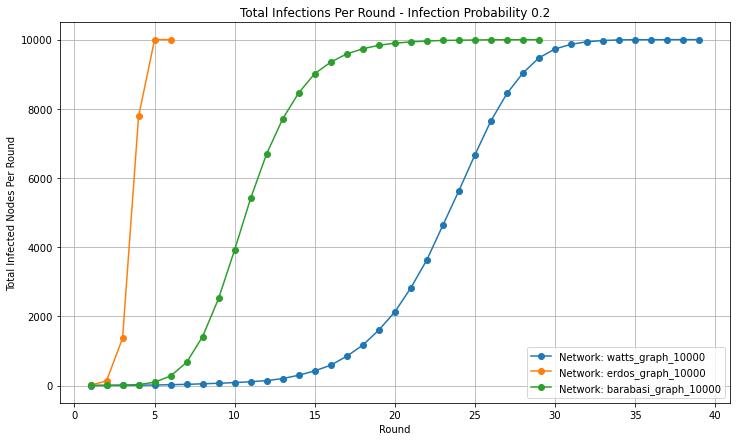

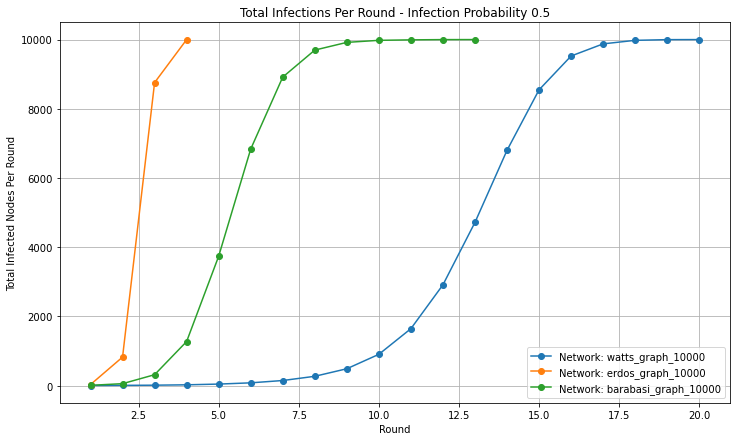

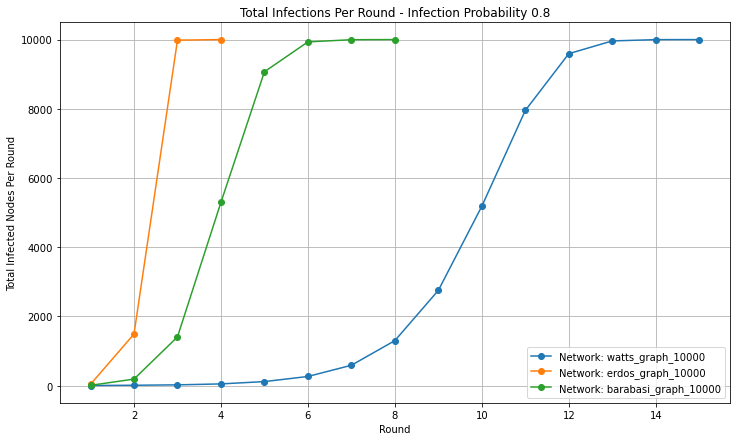

In [45]:
infection_probabilities = [0.2, 0.5, 0.8]
csv_files = ['watts_graph_10000.csv', 'erdos_graph_10000.csv', 'barabasi_graph_10000.csv']
# Data structure to hold simulation results, organized by infection probability
initial_infected_node = '110'  # Assuming nodes are labeled as strings
plot_all_infections_by_probability_no_cure(simulation_results_no_cure(csv_files, infection_probabilities, initial_infected_node))


# Program 2

# Step 5: Function for simulate infection with cure

In [48]:
from csv import writer
from random import choice, random
from csv import reader
def simulate_infection_with_inoculations(net, patient_zero, infection_probability, inoculator, inoculation_probability):
    infected = set([patient_zero])
    inoculated = set([inoculator]) if inoculator else set()
    round_count = 0
    infection_history = []  # Track the number of infections per round
    inoculation_history = []  # Track the number of inoculations per round

    while len(infected) > 0 and len(infected | inoculated) < len(net.nodes()):
        newly_infected = set()
        newly_inoculated = set()
        for infected_node in list(infected):
            for neighbor in net.neighbors(infected_node):
                if neighbor not in infected and neighbor not in inoculated and random() <= infection_probability:
                    newly_infected.add(neighbor)
        for inoculated_node in list(inoculated):
            for neighbor in net.neighbors(inoculated_node):
                if neighbor not in inoculated and random() <= inoculation_probability:
                    newly_inoculated.add(neighbor)
                    if neighbor in infected:
                        infected.remove(neighbor)
        infected.update(newly_infected)
        inoculated.update(newly_inoculated)
        round_count += 1
        infection_history.append(len(newly_infected))
        inoculation_history.append(len(newly_inoculated))

        if not newly_infected and not newly_inoculated:
            break  # Stop if no changes

    return round_count, infection_history

# Step 4: To simutate results: With different Network with different infection and inoculation Probalities.

In [50]:
simulation_results = []

# Fixed probabilities for all simulations
infection_probability = 0.2
inoculation_probability = 0.2

# Initial infected and inoculator nodes
patient_zero = '110'
inoculator = '120'  # Assuming a different node for inoculation
csv_files = ['barabasi_graph_10000.csv', 'watts_graph_10000.csv', 'erdos_graph_10000.csv']
for csv_file in csv_files:
    net = load_network_from_csv(csv_file)
    rounds, infection_history= simulate_infection_with_inoculations(net, patient_zero, infection_probability, inoculator, inoculation_probability)
    rounds_to_infect, infections_per_round = simulate_infection_without_defense(net, initial_infected_node, infection_probability)
    simulation_results.append((csv_file.split('.')[0],infections_per_round, infection_history))

In [53]:
def plot_simulation_results_with_cure(simulation_results):
    plt.figure(figsize=(14, 8))
    
    for network_id, infections_per_round, infection_history in simulation_results:
        # Calculate cumulative sums
        cumulative_infections_cure = np.cumsum(infection_history)
        cumulative_infections_no_cure = np.cumsum(infections_per_round)
        
        # Ensure rounds arrays match in length to the longest outcome
        max_length = max(len(cumulative_infections_cure), len(cumulative_infections_no_cure))
        rounds = np.arange(1, max_length + 1)
        
        # Extend shorter array if necessary
        if len(cumulative_infections_cure) < max_length:
            cumulative_infections_cure = np.pad(cumulative_infections_cure, (0, max_length - len(cumulative_infections_cure)), 'edge')
        if len(cumulative_infections_no_cure) < max_length:
            cumulative_infections_no_cure = np.pad(cumulative_infections_no_cure, (0, max_length - len(cumulative_infections_no_cure)), 'edge')
        
        plt.plot(rounds, cumulative_infections_cure, marker='o', linestyle='-', label=f'{network_id} - Cumulative Infections with Cure')
        plt.plot(rounds, cumulative_infections_no_cure, marker='o', linestyle='--', label=f'{network_id} - Cumulative Infections without Cure')
    
    plt.title('Infection Dynamics With and Without Cure Across Networks')
    plt.xlabel('Round')
    plt.ylabel('Cumulative Count')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'{infection_probability}-{inoculation_probability}.png')
    plt.show()


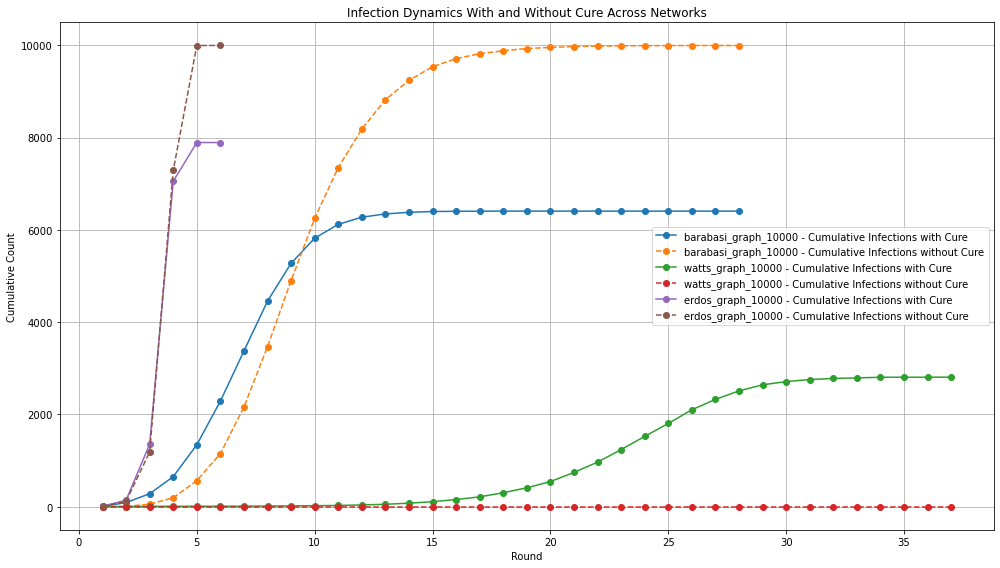

In [54]:
plot_simulation_results_with_cure(simulation_results)

In [56]:
simulation_results = []

# Fixed probabilities for all simulations
infection_probability = 0.5
inoculation_probability = 0.5

# Initial infected and inoculator nodes
patient_zero = '110'
inoculator = '120'  # Assuming a different node for inoculation
csv_files = ['barabasi_graph_10000.csv', 'watts_graph_10000.csv', 'erdos_graph_10000.csv']
for csv_file in csv_files:
    net = load_network_from_csv(csv_file)
    rounds, infection_history= simulate_infection_with_inoculations(net, patient_zero, infection_probability, inoculator, inoculation_probability)
    rounds_to_infect, infections_per_round = simulate_infection_without_defense(net, initial_infected_node, infection_probability)
    simulation_results.append((csv_file.split('.')[0],infections_per_round, infection_history))

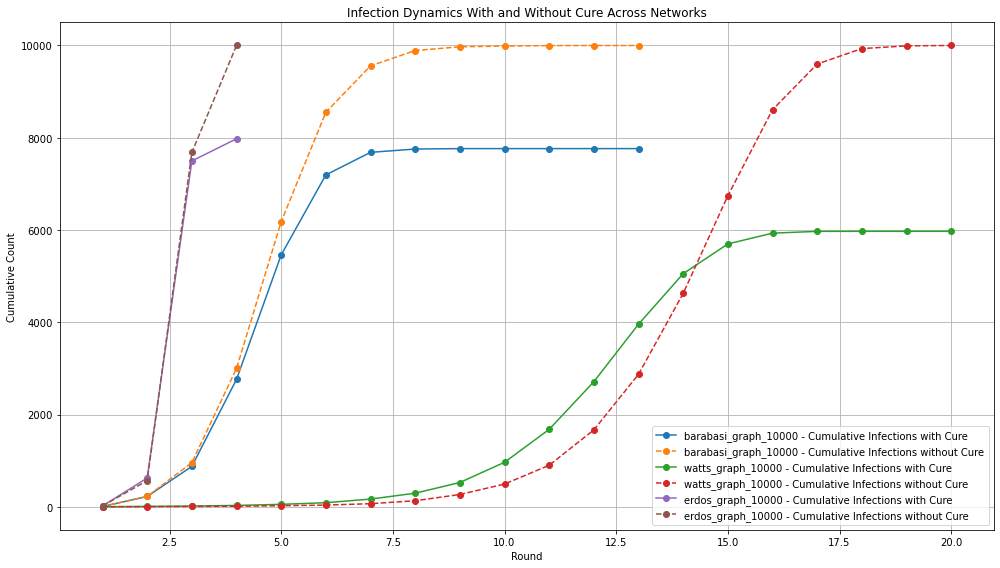

In [57]:
plot_simulation_results_with_cure(simulation_results)

In [58]:
simulation_results = []

# Fixed probabilities for all simulations
infection_probability = 0.8
inoculation_probability = 0.8

# Initial infected and inoculator nodes
patient_zero = '110'
inoculator = '120'  # Assuming a different node for inoculation
csv_files = ['barabasi_graph_10000.csv', 'watts_graph_10000.csv', 'erdos_graph_10000.csv']
for csv_file in csv_files:
    net = load_network_from_csv(csv_file)
    rounds, infection_history= simulate_infection_with_inoculations(net, patient_zero, infection_probability, inoculator, inoculation_probability)
    rounds_to_infect, infections_per_round = simulate_infection_without_defense(net, initial_infected_node, infection_probability)
    simulation_results.append((csv_file.split('.')[0],infections_per_round, infection_history))

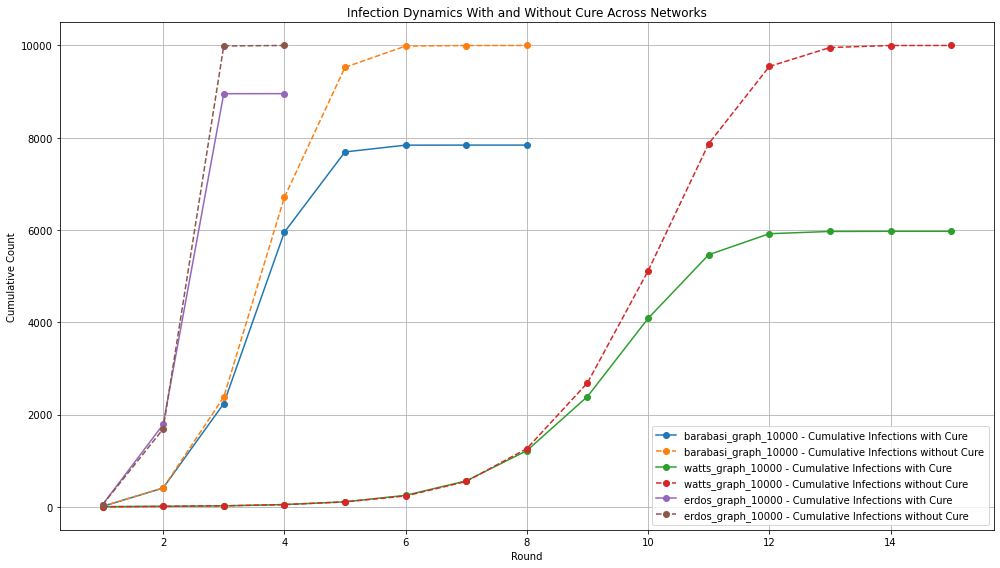

In [59]:
plot_simulation_results_with_cure(simulation_results)

In [60]:
simulation_results = []

# Fixed probabilities for all simulations
infection_probability = 0.5
inoculation_probability = 0.2

# Initial infected and inoculator nodes
patient_zero = '110'
inoculator = '120'  # Assuming a different node for inoculation
csv_files = ['barabasi_graph_10000.csv', 'watts_graph_10000.csv', 'erdos_graph_10000.csv']
for csv_file in csv_files:
    net = load_network_from_csv(csv_file)
    rounds, infection_history= simulate_infection_with_inoculations(net, patient_zero, infection_probability, inoculator, inoculation_probability)
    rounds_to_infect, infections_per_round = simulate_infection_without_defense(net, initial_infected_node, infection_probability)
    simulation_results.append((csv_file.split('.')[0],infections_per_round, infection_history))

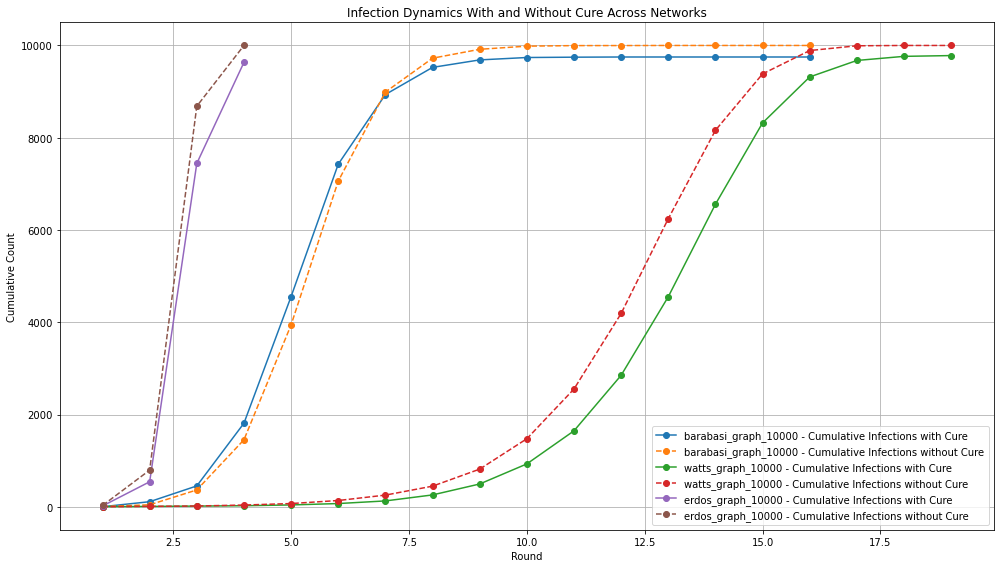

In [61]:
plot_simulation_results_with_cure(simulation_results)

In [62]:
simulation_results = []

# Fixed probabilities for all simulations
infection_probability = 0.5
inoculation_probability = 0.8

# Initial infected and inoculator nodes
patient_zero = '110'
inoculator = '120'  # Assuming a different node for inoculation
csv_files = ['barabasi_graph_10000.csv', 'watts_graph_10000.csv', 'erdos_graph_10000.csv']
for csv_file in csv_files:
    net = load_network_from_csv(csv_file)
    rounds, infection_history= simulate_infection_with_inoculations(net, patient_zero, infection_probability, inoculator, inoculation_probability)
    rounds_to_infect, infections_per_round = simulate_infection_without_defense(net, initial_infected_node, infection_probability)
    simulation_results.append((csv_file.split('.')[0],infections_per_round, infection_history))

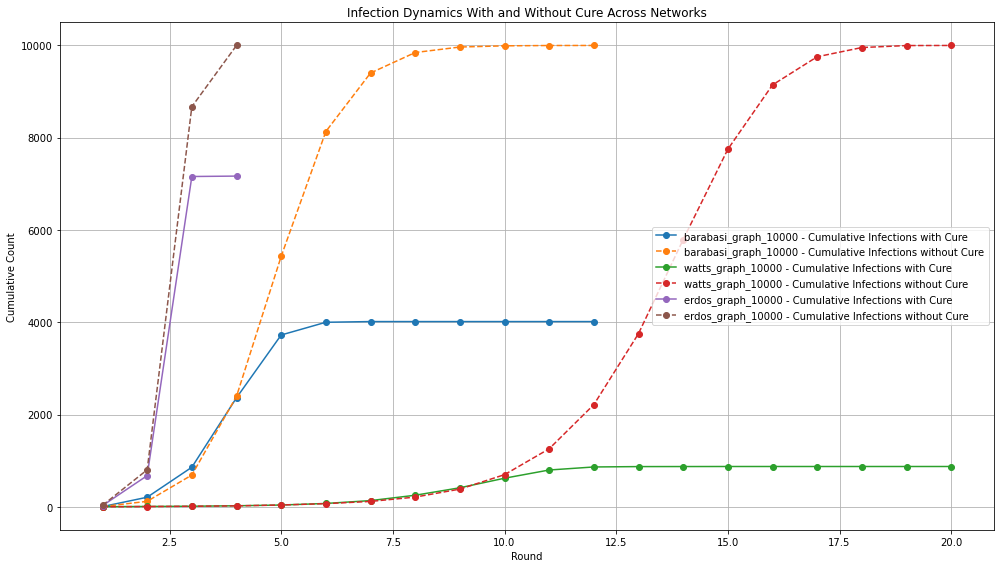

In [63]:
plot_simulation_results_with_cure(simulation_results)

In [68]:
simulation_results = []

# Fixed probabilities for all simulations
infection_probability = 0.8
inoculation_probability = 0.1

# Initial infected and inoculator nodes
patient_zero = '110'
inoculator = '120'  # Assuming a different node for inoculation
csv_files = ['barabasi_graph_10000.csv', 'watts_graph_10000.csv', 'erdos_graph_10000.csv']
for csv_file in csv_files:
    net = load_network_from_csv(csv_file)
    rounds, infection_history= simulate_infection_with_inoculations(net, patient_zero, infection_probability, inoculator, inoculation_probability)
    rounds_to_infect, infections_per_round = simulate_infection_without_defense(net, initial_infected_node, infection_probability)
    simulation_results.append((csv_file.split('.')[0],infections_per_round, infection_history))

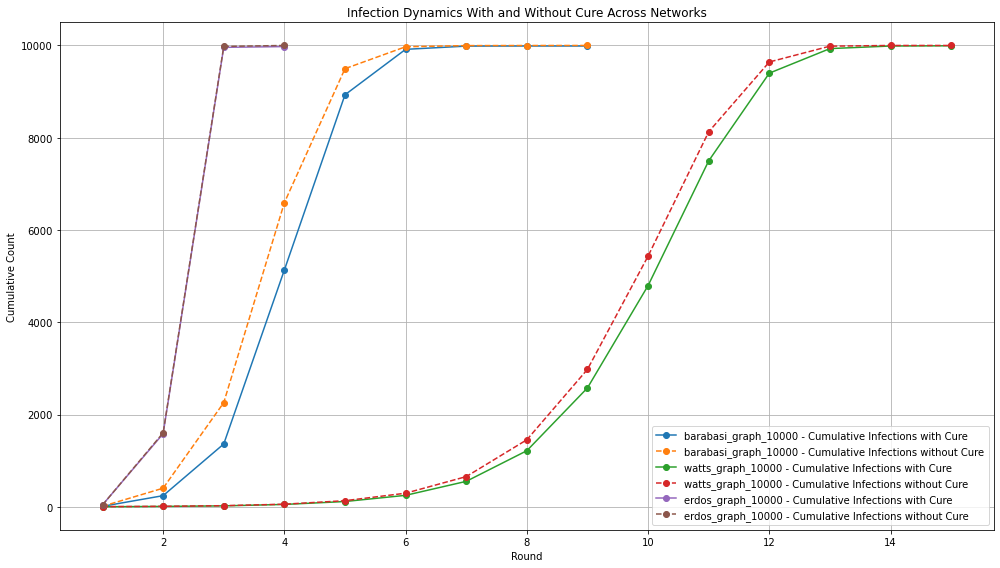

In [69]:
plot_simulation_results_with_cure(simulation_results)

## To answer Question (d)

In [71]:
simulation_results = []

# Fixed probabilities for all simulations
infection_probability = 0.5
inoculation_probability = 0.5

# Initial infected and inoculator nodes
patient_zero = '110'
inoculator = '120'  # Assuming a different node for inoculation
csv_files = ['barabasi_graph_1000.csv', 'watts_graph_1000.csv', 'erdos_graph_1000.csv']
for csv_file in csv_files:
    net = load_network_from_csv(csv_file)
    rounds, infection_history= simulate_infection_with_inoculations(net, patient_zero, infection_probability, inoculator, inoculation_probability)
    rounds_to_infect, infections_per_round = simulate_infection_without_defense(net, initial_infected_node, infection_probability)
    simulation_results.append((csv_file.split('.')[0],infections_per_round, infection_history))

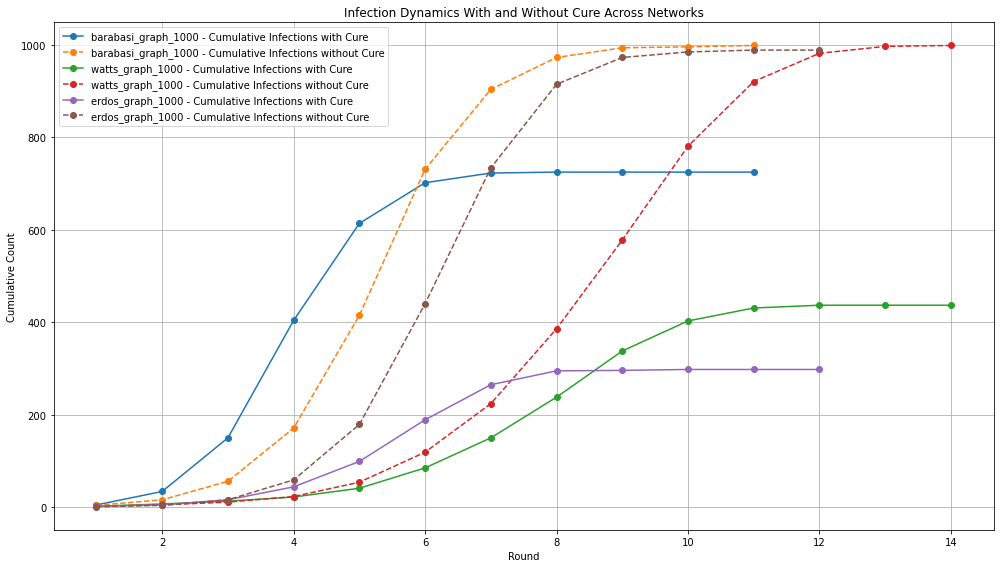

In [72]:
plot_simulation_results_with_cure(simulation_results)

In [73]:
simulation_results = []

# Fixed probabilities for all simulations
infection_probability = 0.5
inoculation_probability = 0.5

# Initial infected and inoculator nodes
patient_zero = '110'
inoculator = '120'  # Assuming a different node for inoculation
csv_files = ['barabasi_graph_5000.csv', 'watts_graph_5000.csv', 'erdos_graph_5000.csv']
for csv_file in csv_files:
    net = load_network_from_csv(csv_file)
    rounds, infection_history= simulate_infection_with_inoculations(net, patient_zero, infection_probability, inoculator, inoculation_probability)
    rounds_to_infect, infections_per_round = simulate_infection_without_defense(net, initial_infected_node, infection_probability)
    simulation_results.append((csv_file.split('.')[0],infections_per_round, infection_history))

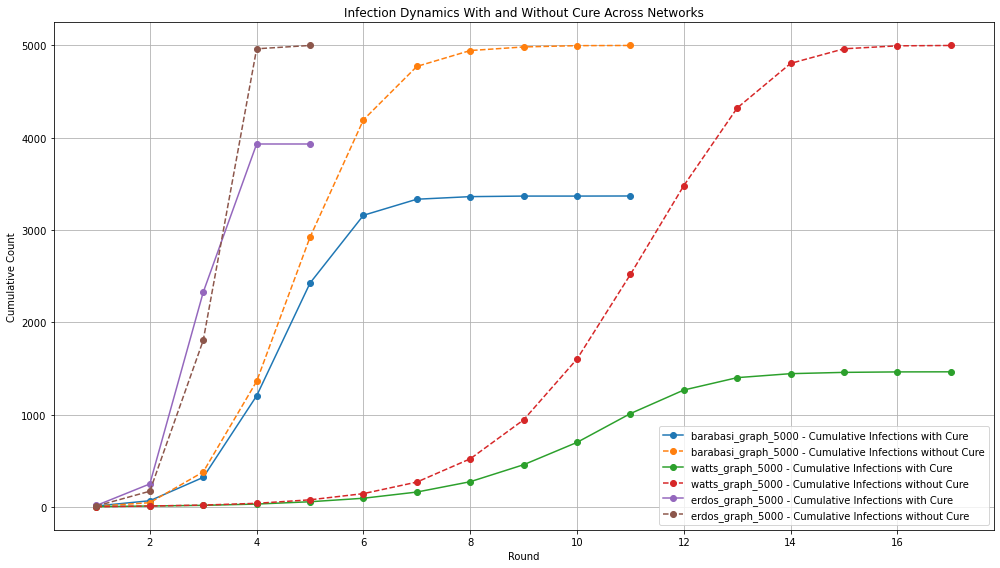

In [74]:
plot_simulation_results_with_cure(simulation_results)

## To answer Question (e)

## Example 1

In [83]:
def get_high_degree_nodes(net):
    """Identify all nodes with the maximum degree in the network."""
    degree_dict = dict(net.degree())
    max_degree = max(degree_dict.values())  # Find the maximum degree value
    max_degree_nodes = [node for node, degree in degree_dict.items() if degree == max_degree]
    return max_degree_nodes

In [89]:
csv_file_1 = 'watts_graph_10000.csv'  # Update this with your actual file path
net1 = load_network_from_csv(csv_file_1)

# Now net is a networkx Graph object
high_degree_nodes_1 = get_high_degree_nodes(net1)
print("High-degree nodes:", high_degree_nodes_1)

csv_file_2 = 'barabasi_graph_10000.csv'  # Update this with your actual file path
net2 = load_network_from_csv(csv_file_2)

# Now net is a networkx Graph object
high_degree_nodes_2 = get_high_degree_nodes(net2)
print("High-degree nodes:", high_degree_nodes_2)

csv_file_3 = 'erdos_graph_10000.csv'  # Update this with your actual file path
net3 = load_network_from_csv(csv_file_3)

# Now net is a networkx Graph object
high_degree_nodes_3 = get_high_degree_nodes(net3)
print("High-degree nodes:", high_degree_nodes_3)

High-degree nodes: ['5154']
High-degree nodes: ['0']
High-degree nodes: ['1259']


In [90]:
# List of network CSV files to simulate on

#csv_files = ['barabasi_graph_10000.csv', 'watts_graph_10000.csv', 'watts_graph_10000.csv']
csv_files_2 = ['barabasi_graph_10000.csv']
csv_files_1 = ['watts_graph_10000.csv']
csv_files_3 = ['erdos_graph_10000.csv']
infection_probability = 0.2  # Example probability for both infection and inoculation
inoculation_probability = 0.2
patient_zero = '110'  # Example initial infected node
# inoculator = '6'  # Example initial inoculator node
# Select one randomly as the inoculator
if high_degree_nodes_1:
    inoculator1 = high_degree_nodes_1.pop()
else:
    print("No high-degree nodes found.")
if high_degree_nodes_2:
    inoculator2 = high_degree_nodes_2.pop()
else:
    print("No high-degree nodes found.")
    
if high_degree_nodes_3:
    inoculator3 = high_degree_nodes_3.pop()
else:
    print("No high-degree nodes found.")
# # Results storage

simulation_results = []

for csv_file in csv_files_1:
    net = load_network_from_csv(csv_file)
    rounds, infection_history = simulate_infection_with_inoculations(net, patient_zero, infection_probability, inoculator, inoculation_probability)
    rounds_to_infect, infections_per_round = simulate_infection_without_defense(net, initial_infected_node, infection_probability)
    simulation_results.append((csv_file.split('.')[0],infections_per_round, infection_history))
    
for csv_file in csv_files_2:
    net = load_network_from_csv(csv_file)
    rounds, infection_history = simulate_infection_with_inoculations(net, patient_zero, infection_probability, inoculator, inoculation_probability)
    rounds_to_infect, infections_per_round = simulate_infection_without_defense(net, initial_infected_node, infection_probability)
    simulation_results.append((csv_file.split('.')[0],infections_per_round, infection_history))
    
for csv_file in csv_files_3:
    net = load_network_from_csv(csv_file)
    rounds, infection_history = simulate_infection_with_inoculations(net, patient_zero, infection_probability, inoculator, inoculation_probability)
    rounds_to_infect, infections_per_round = simulate_infection_without_defense(net, initial_infected_node, infection_probability)
    simulation_results.append((csv_file.split('.')[0],infections_per_round, infection_history))

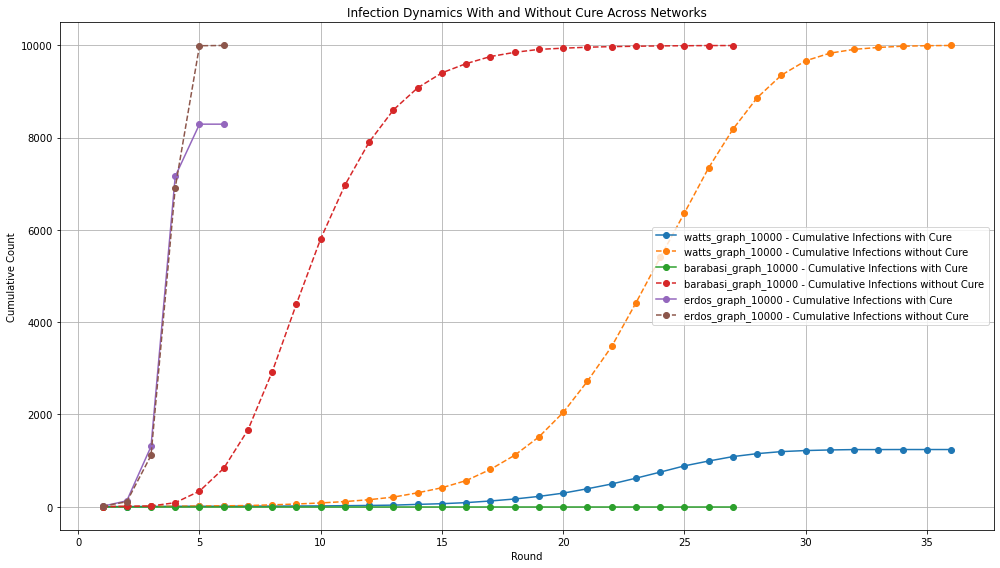

In [91]:
plot_simulation_results_with_cure(simulation_results)

## Example 2

In [92]:
from random import random

def adaptive_inoculation_simulation(net, patient_zero, infection_probability, inoculator, inoculation_probability, adaptive_rounds=5):
    infected = set([patient_zero])
    inoculated = set([inoculator])
    infection_history = []  # Track the number of new infections each round
    inoculation_history = []  # Track the number of new inoculations each round
    
    rounds = 0
    while len(infected) > 0 and len(infected | inoculated) < len(net.nodes()):
        # Inoculate nodes adaptively every 'adaptive_rounds' rounds
        if rounds % adaptive_rounds == 0:
            # Identify high-degree nodes not yet infected or inoculated
            high_risk_nodes = [n for n, d in sorted(net.degree(), key=lambda x: x[1], reverse=True)
                               if n not in infected and n not in inoculated]
            # Inoculate one high-risk node based on current network state
            if high_risk_nodes:
                chosen_for_inoculation = high_risk_nodes[0]
                inoculated.add(chosen_for_inoculation)
                inoculation_history.append(1)  # Track the inoculation
            else:
                inoculation_history.append(0)  # No inoculation happened

        new_infections = set()
        for node in list(infected):
            for neighbor in net.neighbors(node):
                if neighbor not in infected and neighbor not in inoculated and random() <= infection_probability:
                    new_infections.add(neighbor)

        # Update infected and inoculated sets
        infected.update(new_infections)
        infection_history.append(len(new_infections))  # Track the infections
        
        # Attempt to inoculate neighbors of inoculated nodes
        new_inoculations = set()  # To track new inoculations in this round
        for node in list(inoculated):
            for neighbor in net.neighbors(node):
                if neighbor not in inoculated and random() <= inoculation_probability:
                    new_inoculations.add(neighbor)
                    if neighbor in infected:
                        infected.remove(neighbor)
        inoculated.update(new_inoculations)
        inoculation_history.append(len(new_inoculations))  # Update with actual count

        rounds += 1
        if not new_infections:  # Stop if no new infections
            break

    return rounds, infection_history


In [98]:
simulation_results = []
# Define simulation parameters
infection_probability = 0.5  # Example probability for both infection and inoculation
inoculation_probability = 0.5
patient_zero = '110'  # Example initial infected node
inoculator = '120'  # Example initial inoculator node

csv_files = ['barabasi_graph_10000.csv', 'watts_graph_10000.csv', 'erdos_graph_10000.csv']  # Ensure correct file paths
for csv_file in csv_files:
    net = load_network_from_csv(csv_file)
    rounds, infection_history= adaptive_inoculation_simulation(net, patient_zero, infection_probability, inoculator, inoculation_probability)
    rounds_to_infect, infections_per_round = simulate_infection_without_defense(net, initial_infected_node, infection_probability)
    simulation_results.append((csv_file.split('.')[0],infections_per_round, infection_history))

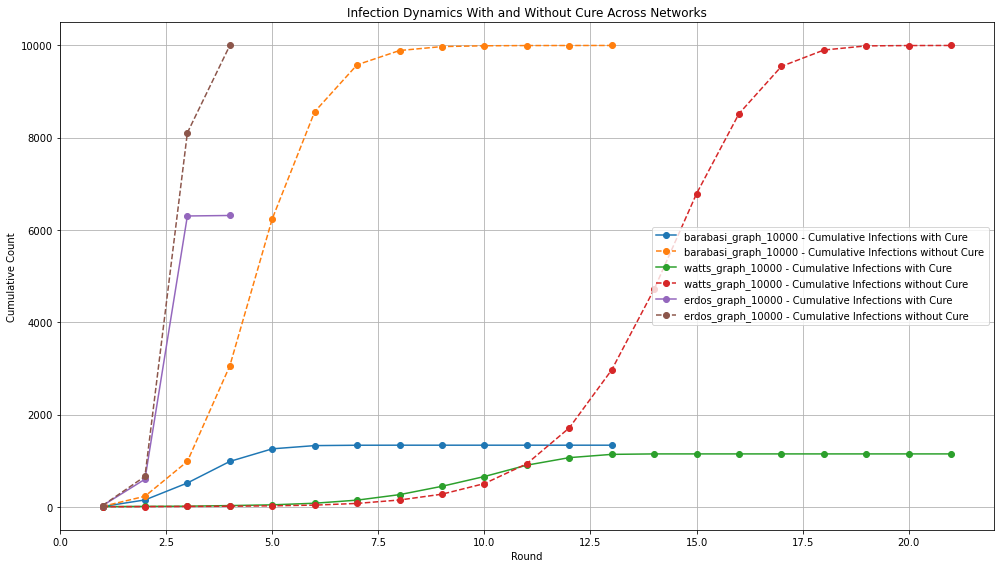

In [99]:
plot_simulation_results_with_cure(simulation_results)